In [107]:
# Import packages
from collections import Counter
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

import time
import warnings

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector


from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn import metrics


from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

import seaborn as sns 
from sklearn.svm import SVC


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn import linear_model
import ast

warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams.update({"font.size": 12})


In [56]:
#Load Dataset
#Independent Variables Dataset
df_comments = pd.read_csv("data/features_sp500.csv", delimiter=";",  encoding="utf-8")
#Dependent Variables Dataset
SP500 = pd.read_csv("data/SandP_500_withHighLow.csv", sep=",")

In [57]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Columns: 1856 entries, created_utc to BAGHOLDER
dtypes: float64(1851), int64(4), object(1)
memory usage: 6.3+ MB


In [58]:
df_comments.head()

,created_utc,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
0,2020-01-01,7.303436,21.868398,6.478874,33.971240,104,104,0.0,130.939615,820.633747,...,23.0,7.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,4.819957,36.665525,0.440766,52.279186,139,2192,0.0,532.971197,4045.896734,...,32.0,31.0,15.0,6.0,31.0,9.0,2.0,3.0,NaN,NaN
2,2020-01-03,4.492971,28.560375,5.997937,41.947068,115,36580,0.0,572.975674,5150.854530,...,44.0,27.0,20.0,7.0,32.0,9.0,2.0,2.0,2.0,NaN
3,2020-01-04,1.844444,4.022222,0.093232,7.623026,28,16584,0.0,275.415978,1741.325526,...,25.0,10.0,14.0,NaN,7.0,NaN,2.0,NaN,1.0,NaN
4,2020-01-05,1.537381,15.433770,4.989659,22.903422,67,460,0.0,253.327217,1925.347894,...,21.0,11.0,9.0,2.0,13.0,1.0,NaN,NaN,NaN,NaN


In [59]:
df_comments.set_index('created_utc',inplace=True)

In [60]:
df_comments.tail()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
created_utc,,,,,,,,,,,,,,,,,,,,,
2021-03-27,8.446676,33.257374,6.096034,24.403107,165,183,164.13,80.916034,363.794892,1156.0,...,21.0,10.0,5.0,1.0,8.0,NaN,12.0,NaN,NaN,NaN
2021-03-28,32.854605,109.840038,16.024446,59.274937,444,764,431.25,1155.309506,5202.869285,15497.0,...,144.0,59.0,30.0,6.0,41.0,2.0,38.0,1.0,2.0,NaN
2021-03-29,56.175202,301.651219,38.316436,178.934077,1187,1253,1183.16,3854.146727,24189.232163,77539.0,...,447.0,193.0,89.0,42.0,139.0,19.0,178.0,10.0,7.0,NaN
2021-03-30,63.219496,262.440205,37.621248,171.155115,1180,1200,1178.24,4048.448978,23129.645792,74152.0,...,376.0,152.0,85.0,34.0,120.0,43.0,127.0,4.0,9.0,NaN
2021-03-31,56.813573,281.942590,44.933902,199.390178,1209,1231,1206.68,3638.755989,21973.660961,70326.0,...,421.0,153.0,93.0,49.0,109.0,28.0,144.0,4.0,3.0,NaN


In [61]:
df_comments = df_comments[~df_comments.index.duplicated(keep='first')]


In [62]:
df_comments.info()


<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 2020-01-01 to 2021-03-31
Columns: 1855 entries, title_polarity to BAGHOLDER
dtypes: float64(1851), int64(4)
memory usage: 6.3+ MB


In [63]:
df_comments.describe()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
count,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02,443.000000,438.000000,438.000000,4.380000e+02,...,442.000000,442.000000,442.000000,433.000000,442.000000,429.000000,431.000000,340.000000,350.000000,28.00000
mean,14.537286,156.427513,15.484208,151.189946,678.720090,4.617169e+04,565.842099,2114.959322,18581.256645,6.059937e+04,...,279.726244,156.402715,74.671946,65.697460,125.918552,28.128205,94.187935,13.250000,7.311429,1.50000
std,35.929044,537.983705,34.861226,467.054727,2447.165716,3.140796e+05,2426.463128,2438.056854,21605.877897,7.707322e+04,...,255.402141,424.423462,130.992214,388.620004,322.354522,114.572998,337.723176,63.938156,25.142633,0.96225
min,-21.581163,3.839683,-2.282257,1.461834,12.000000,3.100000e+01,0.000000,2.618842,33.762071,1.120000e+02,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2.689167,45.433838,6.460240,58.661751,206.500000,3.040000e+02,0.000000,1111.788159,9146.453981,2.892075e+04,...,143.250000,52.000000,32.250000,5.000000,34.250000,5.000000,4.000000,2.000000,1.000000,1.00000
50%,6.369248,73.400514,10.009150,91.043298,327.000000,5.750000e+02,231.000000,1635.806388,15433.488013,5.037950e+04,...,219.000000,85.000000,49.000000,11.000000,67.000000,11.000000,9.000000,3.000000,3.000000,1.00000
75%,13.812426,127.810205,13.936974,134.459017,544.000000,2.081500e+03,423.985000,2145.751236,20478.480102,6.563450e+04,...,325.750000,124.750000,68.750000,20.000000,105.750000,18.000000,34.000000,5.000000,5.000000,1.25000
max,535.607415,9509.963580,560.186794,8483.404539,42898.000000,4.315205e+06,42746.920000,24582.360475,252889.928549,1.090474e+06,...,1934.000000,6235.000000,1471.000000,5448.000000,3609.000000,1554.000000,3684.000000,875.000000,326.000000,4.00000


In [64]:
SP500.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Closing Delta,Closing Movement
0,2017-02-28,218.779483,219.038316,218.178624,218.594604,96961900,0.0,0,0.00,0
1,2017-03-01,220.369463,222.153576,220.350971,221.654388,149158200,0.0,0,3.06,1
2,2017-03-02,221.451009,221.460262,220.203067,220.258530,70246000,0.0,0,-1.40,-1
3,2017-03-03,220.166084,220.572826,219.759343,220.397186,81974300,0.0,0,0.14,1
4,2017-03-06,219.546728,220.119856,219.093764,219.740860,55391500,0.0,0,-0.66,-1


In [65]:
df_features = df_comments
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 2020-01-01 to 2021-03-31
Columns: 1855 entries, title_polarity to BAGHOLDER
dtypes: float64(1851), int64(4)
memory usage: 6.3+ MB


In [66]:
#replace Nan with 0
df_features = df_features.fillna(0)

In [67]:
SP500 = SP500[["Date","Close","Closing Movement"]]

In [68]:
df_features.head()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
created_utc,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7.303436,21.868398,6.478874,33.971240,104,104,0.0,130.939615,820.633747,2543.0,...,23.0,7.0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,4.819957,36.665525,0.440766,52.279186,139,2192,0.0,532.971197,4045.896734,12594.0,...,32.0,31.0,15.0,6.0,31.0,9.0,2.0,3.0,0.0,0.0
2020-01-03,4.492971,28.560375,5.997937,41.947068,115,36580,0.0,572.975674,5150.854530,16276.0,...,44.0,27.0,20.0,7.0,32.0,9.0,2.0,2.0,2.0,0.0
2020-01-04,1.844444,4.022222,0.093232,7.623026,28,16584,0.0,275.415978,1741.325526,5419.0,...,25.0,10.0,14.0,0.0,7.0,0.0,2.0,0.0,1.0,0.0
2020-01-05,1.537381,15.433770,4.989659,22.903422,67,460,0.0,253.327217,1925.347894,6162.0,...,21.0,11.0,9.0,2.0,13.0,1.0,0.0,0.0,0.0,0.0


In [69]:
df_features.shape

(443, 1855)

In [70]:
df_features.describe()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
count,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02,443.000000,443.000000,443.000000,4.430000e+02,...,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,14.537286,156.427513,15.484208,151.189946,678.720090,4.617169e+04,565.842099,2091.088449,18371.535915,5.991540e+04,...,279.094808,156.049661,74.503386,64.214447,125.634312,27.239278,91.636569,10.169300,5.776524,0.094808
std,35.929044,537.983705,34.861226,467.054727,2447.165716,3.140796e+05,2426.463128,2434.524403,21573.012485,7.690355e+04,...,255.459005,424.008193,130.892038,384.322895,322.045234,112.851468,333.458697,56.274624,22.539502,0.435989
min,-21.581163,3.839683,-2.282257,1.461834,12.000000,3.100000e+01,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.689167,45.433838,6.460240,58.661751,206.500000,3.040000e+02,0.000000,1087.708502,8978.360351,2.782750e+04,...,143.000000,51.500000,32.000000,4.500000,34.000000,4.000000,4.000000,1.000000,1.000000,0.000000
50%,6.369248,73.400514,10.009150,91.043298,327.000000,5.750000e+02,231.000000,1632.767239,15370.494150,5.019500e+04,...,219.000000,85.000000,49.000000,11.000000,67.000000,10.000000,8.000000,2.000000,2.000000,0.000000
75%,13.812426,127.810205,13.936974,134.459017,544.000000,2.081500e+03,423.985000,2140.903162,20418.679947,6.552200e+04,...,325.500000,124.500000,68.500000,19.000000,105.500000,17.500000,34.000000,4.000000,4.000000,0.000000
max,535.607415,9509.963580,560.186794,8483.404539,42898.000000,4.315205e+06,42746.920000,24582.360475,252889.928549,1.090474e+06,...,1934.000000,6235.000000,1471.000000,5448.000000,3609.000000,1554.000000,3684.000000,875.000000,326.000000,4.000000


In [71]:
# Join Labels with features
SP500.set_index("Date", inplace=True)
SP500["created_utc"] = SP500.index
SP500.set_index("created_utc", inplace=True)
dataset_with_labels = df_features.join(SP500, how='inner')

In [72]:
dataset_with_labels.head()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER,Close,Closing Movement
created_utc,,,,,,,,,,,,,,,,,,,,,
2020-01-02,4.819957,36.665525,0.440766,52.279186,139,2192,0.0,532.971197,4045.896734,12594.0,...,15.0,6.0,31.0,9.0,2.0,3.0,0.0,0.0,317.873199,1
2020-01-03,4.492971,28.560375,5.997937,41.947068,115,36580,0.0,572.975674,5150.854530,16276.0,...,20.0,7.0,32.0,9.0,2.0,2.0,2.0,0.0,315.466217,-1
2020-01-06,2.237558,26.646118,1.099999,47.910753,141,142,0.0,498.933519,4028.524789,12821.0,...,24.0,2.0,20.0,4.0,1.0,1.0,0.0,0.0,316.669739,1
2020-01-07,0.928602,33.124699,2.678287,58.454821,143,143,0.0,439.226358,4134.806548,13415.0,...,19.0,3.0,31.0,3.0,2.0,0.0,1.0,0.0,315.779327,-1
2020-01-08,-4.471613,46.010141,5.871738,95.186840,226,226,0.0,560.857685,7624.799750,24207.0,...,21.0,5.0,43.0,12.0,4.0,1.0,1.0,0.0,317.462311,1


In [73]:
dataset_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 2020-01-02 to 2021-03-31
Columns: 1857 entries, title_polarity to Closing Movement
dtypes: float64(1852), int64(5)
memory usage: 4.3+ MB


In [74]:
dataset_with_labels = dataset_with_labels[~dataset_with_labels.index.duplicated(keep='first')]

In [75]:
dataset_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 2020-01-02 to 2021-03-31
Columns: 1857 entries, title_polarity to Closing Movement
dtypes: float64(1852), int64(5)
memory usage: 4.3+ MB


In [76]:
dataset_with_labels.loc[(dataset_with_labels['Closing Movement'] == -1),'Closing Movement']=0

In [77]:
#backup
Dataset = dataset_with_labels

In [78]:
labels_clsfier = dataset_with_labels.pop('Closing Movement')

In [79]:
#Feature Normalization
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(dataset_with_labels)

# transform training data
norm_features = norm.transform(dataset_with_labels)


In [80]:
# Creating backup the dataframe of the scaled data
dataset = pd.DataFrame(norm_features, index=dataset_with_labels.index, columns=dataset_with_labels.columns)
dataset.head()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER,Close
created_utc,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.047383,0.003048,0.000877,0.005641,0.002519,0.000501,0.0,0.021681,0.015999,0.011549,...,0.004972,0.010197,0.001101,0.008590,0.005792,0.000543,0.003429,0.000000,0.0,0.556488
2020-01-03,0.046796,0.002195,0.010796,0.004422,0.001960,0.008470,0.0,0.023308,0.020368,0.014926,...,0.004330,0.013596,0.001285,0.008867,0.005792,0.000543,0.002286,0.006135,0.0,0.542882
2020-01-06,0.042748,0.001994,0.002054,0.005126,0.002566,0.000026,0.0,0.020296,0.015930,0.011757,...,0.004491,0.016315,0.000367,0.005542,0.002574,0.000271,0.001143,0.000000,0.0,0.549685
2020-01-07,0.040399,0.002676,0.004871,0.006369,0.002613,0.000026,0.0,0.017868,0.016350,0.012302,...,0.004491,0.012916,0.000551,0.008590,0.001931,0.000543,0.000000,0.003067,0.0,0.544652
2020-01-08,0.030707,0.004032,0.010571,0.010701,0.004549,0.000045,0.0,0.022815,0.030151,0.022199,...,0.008019,0.014276,0.000918,0.011915,0.007722,0.001086,0.001143,0.003067,0.0,0.554165


In [81]:
labels_reg = dataset.pop('Close')

In [82]:
dataset.describe()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,0.069333,0.019814,0.033369,0.021586,0.019124,0.013537,0.016824,0.098363,0.086980,0.066339,...,0.165006,0.029308,0.056687,0.015491,0.041772,0.023101,0.027726,0.015453,0.023313,0.033607
std,0.074149,0.067637,0.073634,0.065816,0.068275,0.084524,0.067938,0.100362,0.092077,0.078402,...,0.137605,0.074528,0.089279,0.083794,0.093918,0.085788,0.094503,0.076371,0.082049,0.129435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043916,0.005036,0.015139,0.009059,0.005505,0.000075,0.000000,0.061210,0.055063,0.042096,...,0.099276,0.012189,0.027192,0.001652,0.016071,0.006435,0.001357,0.001143,0.003067,0.000000
50%,0.051705,0.008215,0.020898,0.012212,0.008165,0.000155,0.006732,0.078465,0.069985,0.053114,...,0.128749,0.016520,0.038749,0.002753,0.022998,0.009009,0.002986,0.003429,0.009202,0.000000
75%,0.067221,0.014292,0.027361,0.016489,0.013554,0.000566,0.012166,0.094418,0.090600,0.067799,...,0.181489,0.021652,0.048946,0.004222,0.031865,0.012870,0.010858,0.005714,0.015337,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
# fig, ax = plt.subplots(figsize=(50,50))
# dataset_with_labels.hist( ax=ax)

# fig.savefig("plots/histogram_original.png")

In [84]:
# fig, ax = plt.subplots(figsize=(50,50))
# dataset.hist( ax=ax)

# fig.savefig("plots/histogram_normalized.png")

In [85]:
# #Remove some of the highly correlated independent variables. (if multicollinearity problem)

# plt.rcParams.update({"font.size": 12})
# cm = np.corrcoef(dataset_with_labels.values.T) 
# f, ax = plt.subplots(figsize =(60, 60)) #figsize =(100, 100)
# heatmap = sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1,yticklabels = dataset_with_labels.columns,xticklabels = dataset_with_labels.columns) 
# fig = heatmap.get_figure()
# fig.savefig("plots/heatmap_original.png")

In [86]:

# plt.rcParams.update({"font.size": 12})
# cm = np.corrcoef(dataset.values.T) 
# f, ax = plt.subplots(figsize =(60, 60)) #figsize =(100, 100)
# heatmap = sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1,yticklabels = dataset.columns,xticklabels = dataset.columns) 
# fig = heatmap.get_figure()
# fig.savefig("plots/heatmap_normalized.png")

In [87]:
# Partitioning the dataset into test and train (test = (25% of total data) and train = (75% of total data) )
X_train, X_test, y_train, y_test = train_test_split(dataset, labels_clsfier, test_size=0.25, random_state = 4)


In [88]:
## For Hyper parameter selection used Grid Search

def parameter_selection(model,param_grid, X_train, y_train, nfolds=10):
    grid_search = GridSearchCV(model, param_grid, cv=nfolds,verbose =1,n_jobs=4)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    return grid_search

In [89]:
## Applying logistic regression with different parameters
## C - Margin : smaller values specify stronger regularization

LGR_grid_result=parameter_selection(LogisticRegression(),{'penalty':['l1', 'l2'],'C':[0.00001, 0.0001, 0.001,0.01,0.5,1,10,100]}, X_train, y_train,10)
LGR_grid_result.best_estimator_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    3.9s


{'C': 1e-05, 'penalty': 'l2'}


[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    6.5s finished


LogisticRegression(C=1e-05)

In [90]:
## Applying SVM with different parameters
from sklearn.svm import SVC
SVC_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,50,100,150], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10,100], 'kernel':['poly','rbf']}
SVC_grid_result=parameter_selection(SVC(),SVC_param_grid, X_train, y_train,5)
SVC_grid_result.best_estimator_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   19.7s


{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


[Parallel(n_jobs=4)]: Done 560 out of 560 | elapsed:   24.5s finished


SVC(C=0.1, gamma=1, kernel='poly')

<PandasArray>
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0]
Length: 77, dtype: int64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Logistic Regression
---------------


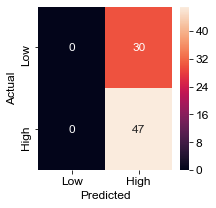

0.5736559139784946
1.0
0.5736559139784946
0.5401960784313725

---------------
Means Cross Validation Accuracy Score :0.7573867073551119
Precision : From the Prediction of High, 56.99999999999999% values are predicted correctly
Recall : From overall High, 100.0% values are predicted correctly
AUC : 54.0%
---------------
------
True Nagatives: 0
Specificity: 0.0
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        30
        High       0.61      1.00      0.76        47

    accuracy                           0.61        77
   macro avg       0.31      0.50      0.38        77
weighted avg       0.37      0.61      0.46        77

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Linear SVM
---------------


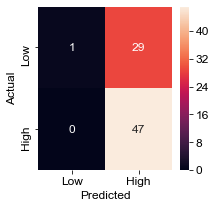

0.5731940251072621
0.9826797385620916
0.5703225806451613
0.5094519859225742

---------------
Means Cross Validation Accuracy Score :0.755139116418226
Precision : From the Prediction of High, 56.99999999999999% values are predicted correctly
Recall : From overall High, 98.0% values are predicted correctly
AUC : 51.0%
---------------
------
True Nagatives: 1
Specificity: 0.03333333333333333
              precision    recall  f1-score   support

         Low       1.00      0.03      0.06        30
        High       0.62      1.00      0.76        47

    accuracy                           0.62        77
   macro avg       0.81      0.52      0.41        77
weighted avg       0.77      0.62      0.49        77

[0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1
 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1
 1 0 0]
gridsearch SVM
---------------


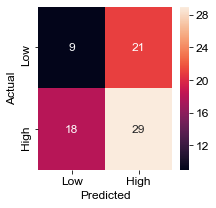

0.607813272160742
0.6901960784313725
0.560752688172043
0.5636249371543489

---------------
Means Cross Validation Accuracy Score :0.7475238839684657
Precision : From the Prediction of High, 61.0% values are predicted correctly
Recall : From overall High, 69.0% values are predicted correctly
AUC : 56.00000000000001%
---------------
------
True Nagatives: 9
Specificity: 0.3
              precision    recall  f1-score   support

         Low       0.33      0.30      0.32        30
        High       0.58      0.62      0.60        47

    accuracy                           0.49        77
   macro avg       0.46      0.46      0.46        77
weighted avg       0.48      0.49      0.49        77

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
RBF SVM
---------------


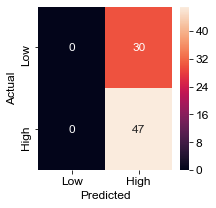

0.5736559139784946
1.0
0.5736559139784946
0.5059954751131222

---------------
Means Cross Validation Accuracy Score :0.7573867073551119
Precision : From the Prediction of High, 56.99999999999999% values are predicted correctly
Recall : From overall High, 100.0% values are predicted correctly
AUC : 51.0%
---------------
------
True Nagatives: 0
Specificity: 0.0
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        30
        High       0.61      1.00      0.76        47

    accuracy                           0.61        77
   macro avg       0.31      0.50      0.38        77
weighted avg       0.37      0.61      0.46        77

[1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 1]
Decision Tree
---------------


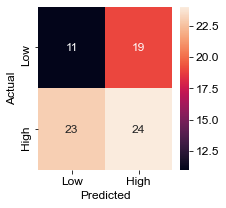

0.6085737778733135
0.4977124183006536
0.5641935483870968
0.5739819004524886

---------------
Means Cross Validation Accuracy Score :0.7547105151950613
Precision : From the Prediction of High, 62.0% values are predicted correctly
Recall : From overall High, 52.0% values are predicted correctly
AUC : 54.0%
---------------
------
True Nagatives: 11
Specificity: 0.36666666666666664
              precision    recall  f1-score   support

         Low       0.32      0.37      0.34        30
        High       0.56      0.51      0.53        47

    accuracy                           0.45        77
   macro avg       0.44      0.44      0.44        77
weighted avg       0.47      0.45      0.46        77

[0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1
 1 1 1]
Random Forest
---------------


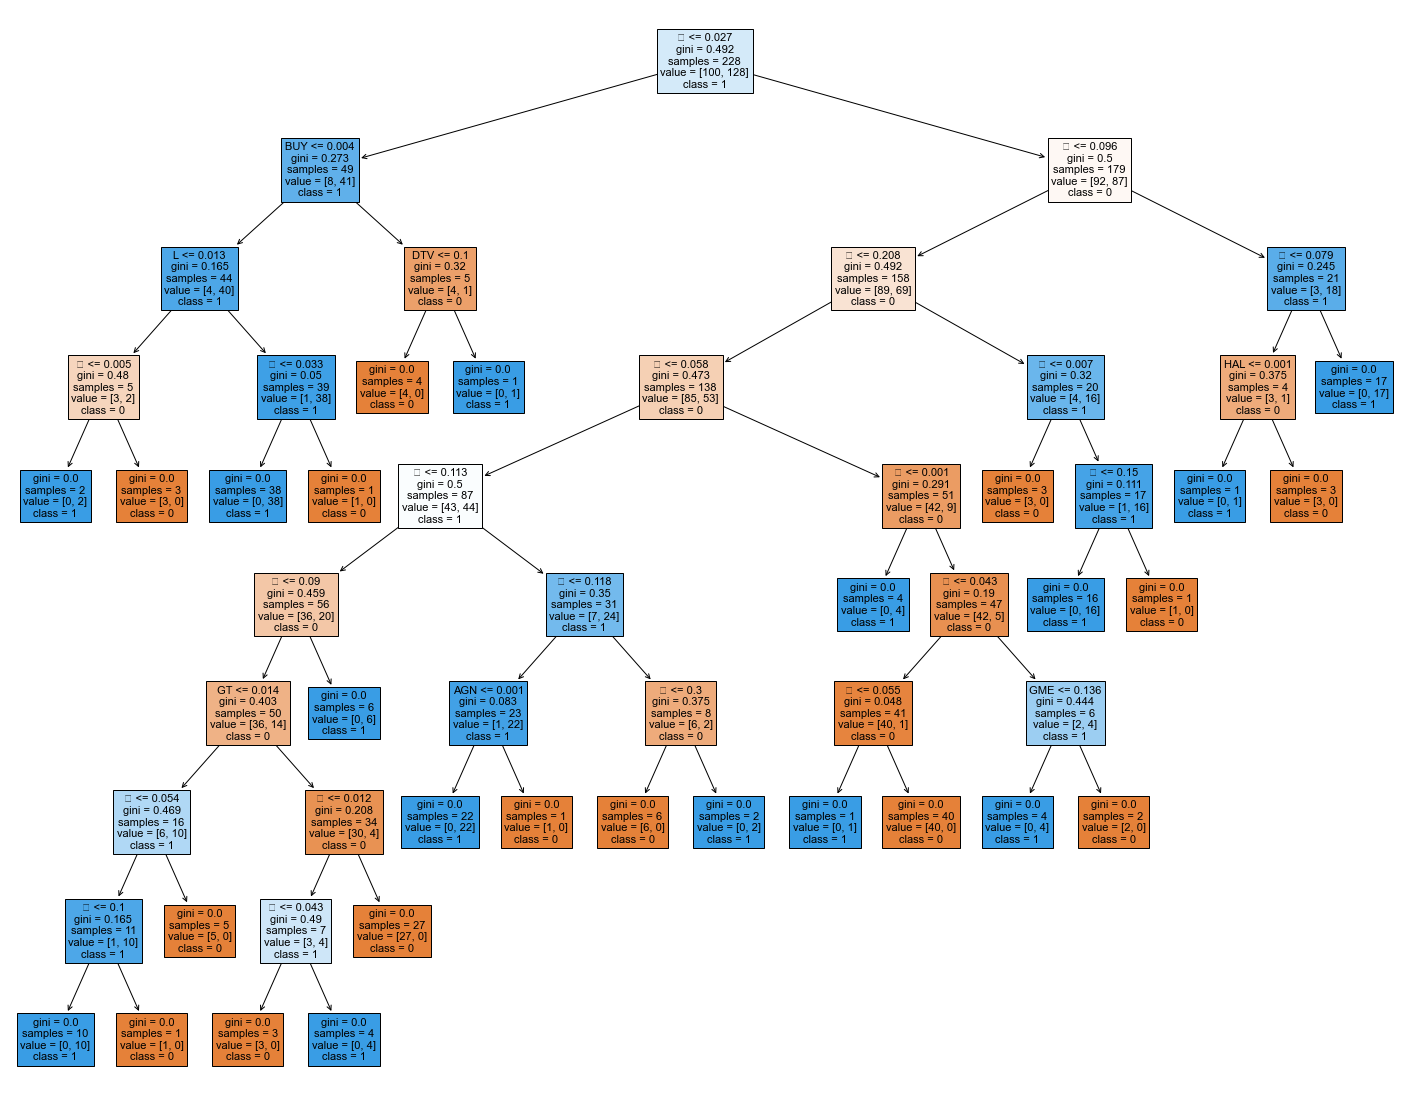

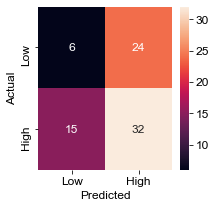

0.5480979078392871
0.7186274509803922
0.5375268817204301
0.45701357466063347

---------------
Means Cross Validation Accuracy Score :0.7249912854374577
Precision : From the Prediction of High, 56.99999999999999% values are predicted correctly
Recall : From overall High, 78.0% values are predicted correctly
AUC : 55.00000000000001%
---------------
------
True Nagatives: 6
Specificity: 0.2
              precision    recall  f1-score   support

         Low       0.29      0.20      0.24        30
        High       0.57      0.68      0.62        47

    accuracy                           0.49        77
   macro avg       0.43      0.44      0.43        77
weighted avg       0.46      0.49      0.47        77



In [91]:
from sklearn.metrics import classification_report
rf_norm =RandomForestClassifier(max_depth=55, n_estimators=100, max_features=10)
dt_norm = DecisionTreeClassifier(max_depth=50)
names = ["Logistic Regression","Linear SVM", "gridsearch SVM" ,"RBF SVM",
         "Decision Tree", "Random Forest"]

classifiers = [
   LGR_grid_result.best_estimator_,
    SVC(kernel="linear", C=0.025),
    SVC_grid_result.best_estimator_,
    SVC(gamma=2, C=1),
  
    dt_norm,
    rf_norm

    ]
print(y_test[:77].array)
# iterate over classifiers
for name, clf in zip(names, classifiers):
       
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    ## Validation
    y_pred = clf.predict(X_test)
    
    print(y_pred)
    y_train_pred=clf.predict(X_train)    
   
    
    ## Confusion Matrix 
    print(name)
    print('---------------')
    
    fig, ax = plt.subplots(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['Low','High'], yticklabels=['Low','High'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    ## K Fold Validation with 10 Folds
    scores = cross_val_score(clf, dataset,labels_clsfier, cv=10, scoring="accuracy")
    scores=np.sqrt(scores)
    print(np.mean((cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="precision"))))
    print((np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="recall"))))
    print(np.mean(cross_val_score(clf, dataset,labels_clsfier, cv=10, scoring="accuracy")))
   
    print(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="roc_auc")))
    print()
    
    print('---------------')
    print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
    print('Precision : From the Prediction of High, '+str(round(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="precision")),2)*100)+'% values are predicted correctly')
    print('Recall : From overall High, '+str(round(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="recall")),2)*100)+'% values are predicted correctly')
    print('AUC : '+str(round(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="roc_auc")),2)*100)+'%')
    print('---------------')
    
    
    print('------')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Nagatives:",tn)
    print("Specificity:",tn / (tn + fp))
    print(classification_report(y_test[:77].array, y_pred, target_names=['Low','High']))
    #Visualization for Decision Tree
    if name == 'Decision Tree':
        text_representation = tree.export_text(clf)
        #print(text_representation)
        with open("plots/decistion_tree.log", "w") as fout:
            fout.write(text_representation)
        fig = plt.figure(figsize=(25,20))
        _ = tree.plot_tree(clf, 
                   feature_names=dataset.columns,  
                   class_names=["0","1"],
                   filled=True)
        fig.savefig("plots/Visualize"+name +".png")
#         from dtreeviz.trees import dtreeviz # remember to load the package

#         viz = dtreeviz(clf, X, y,
#                         target_name="target",
#                         feature_names=iris.feature_names,
#                         class_names=list(iris.target_names))

#         viz


In [92]:
import time

start_time = time.time()
importances = rf_norm.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf_norm.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.017 seconds


<AxesSubplot:>

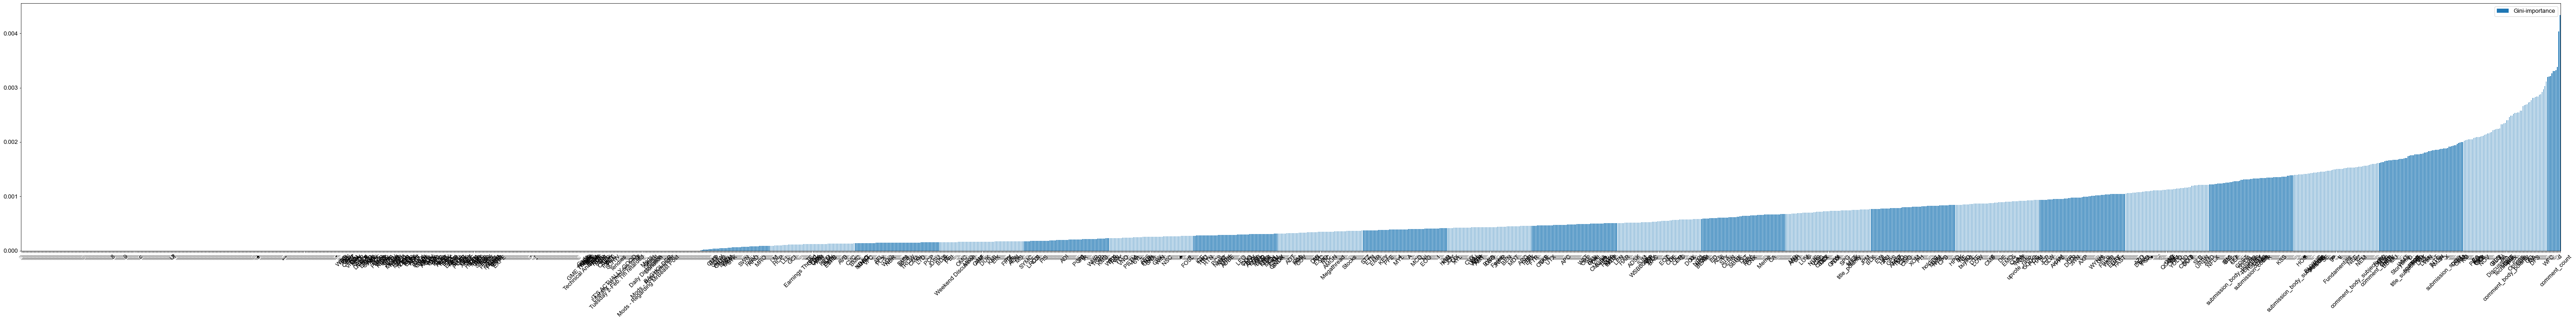

In [93]:
plt.rcParams.update({"font.size": 13, "figure.figsize": [100,10]})
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(dataset.columns, rf_norm.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [94]:
importances_imp =  importances[importances['Gini-importance'] > 0.0025] 

In [95]:
importances_imp.sort_values(by=['Gini-importance'],ascending=False)

,Gini-importance
d,0.004336
🇸,0.004037
😤,0.003379
comment_count,0.003322
👏,0.003306
🍆,0.003305
📡,0.003268
🇺,0.003217
WFC,0.003205
😣,0.003194


In [96]:
len(importances_imp)

35

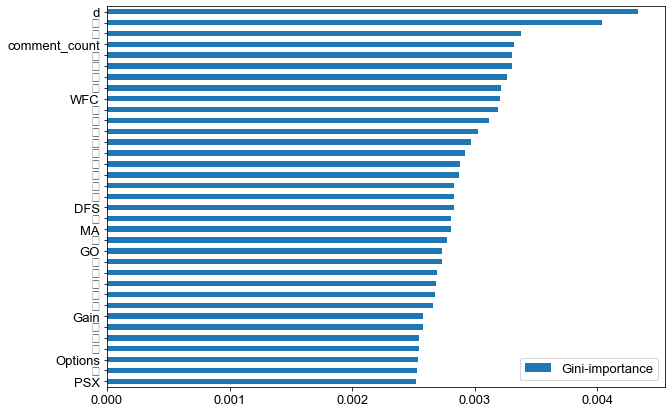

In [97]:
plt.rcParams.update({"font.size": 13, "figure.figsize": [10,7]})
plt.rc('font', **{'sans-serif' : 'Arial',
                         'family' : 'sans-serif'})
importances_imp.sort_values(by='Gini-importance').plot(kind='barh')
plt.savefig("plots/f_i_rf_gini.png")

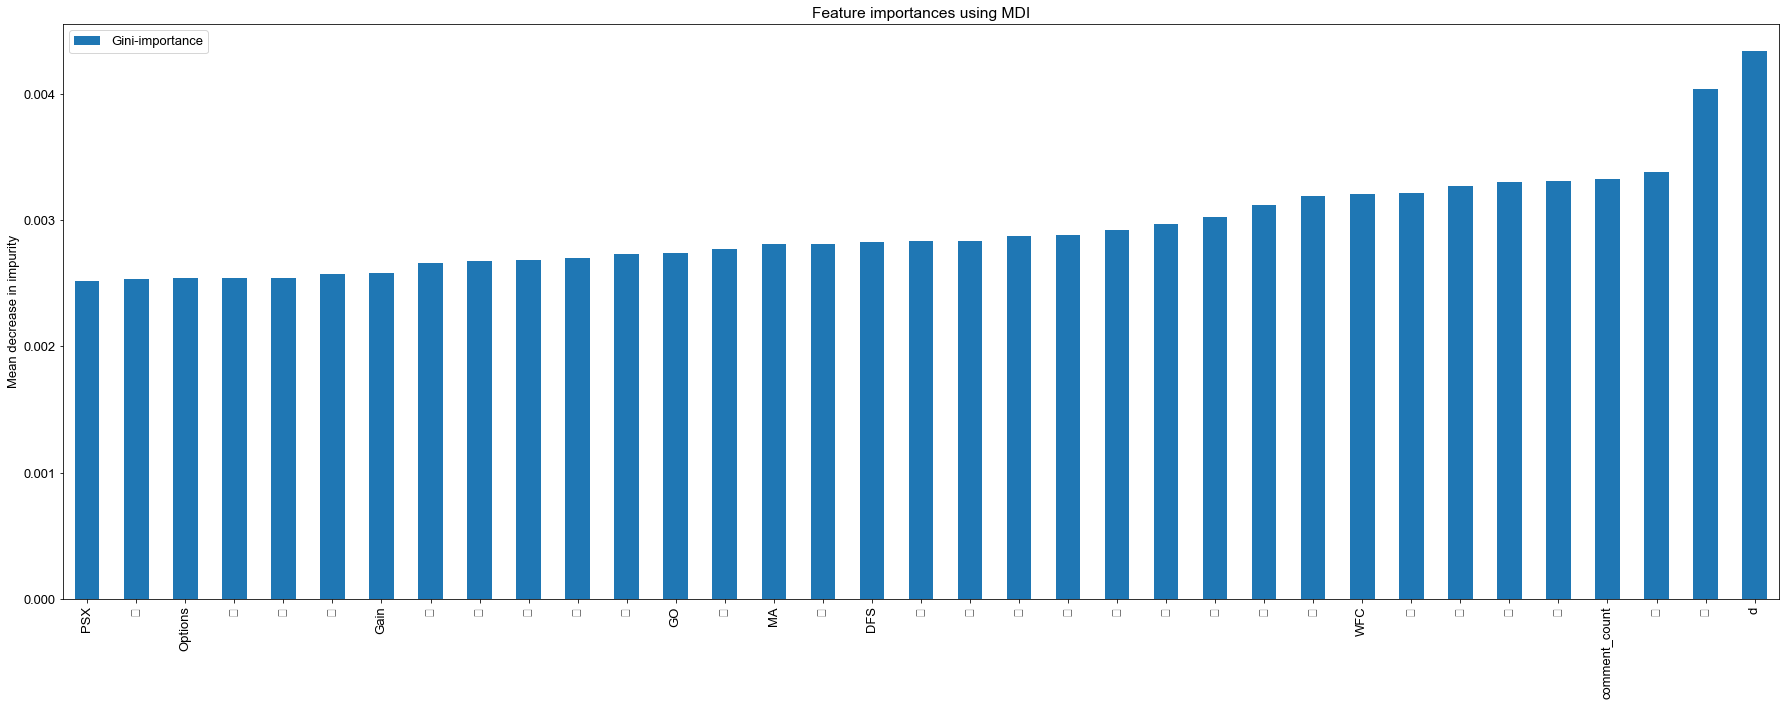

In [98]:
plt.rcParams.update({"font.size": 13, "figure.figsize": [25,5]})


fig, ax = plt.subplots(figsize=(25,10))
importances_imp.sort_values(by='Gini-importance').plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

[('🤭', 37.86948361092743), ('🚜', 38.33735870553995), ('🙀', 38.62471867420572), ('🚱', 38.96357556340108), ('📔', 38.964677690752495), ('📉', 38.978954617786755), ('🤕', 39.831222850586364), ('🎼', 40.56217521305757), ('\U0001f7ea', 40.57306213491473), ('LM', 40.77763792230804), ('EQT', 40.78164889899743), ('🥧', 40.95148342624601), ('ATI', 41.04701206002438), ('🍈', 41.21159535970661), ('🍐', 41.231159267861415), ('🚚', 41.38286683589104), ('JDSU', 41.61814348606089), ('〽', 41.66538709649269), ('Satire', 42.47449615022984), ('🦏', 42.75231057041991), ('🥟', 42.98011546292625), ('🌪', 43.01977866294912), ('🧧', 43.30137638023412), ('💻', 43.64712354946811), ('🕞', 44.24392041112273), ('🍜', 44.743023174337466), ('Storytime', 44.8299891477427), ('🥴', 44.83159753981491), ('🤱', 44.90975637967275), ('🥠', 45.1499116833753), ('🧡', 45.304929829180566), ('😥', 45.97127793712392), ('\U0001fa91', 46.22486577759225), ('LLL', 47.28905040815313), ('🚾', 47.28907275396893), ('CSC', 47.29530311722252), ('📿', 47.6528061

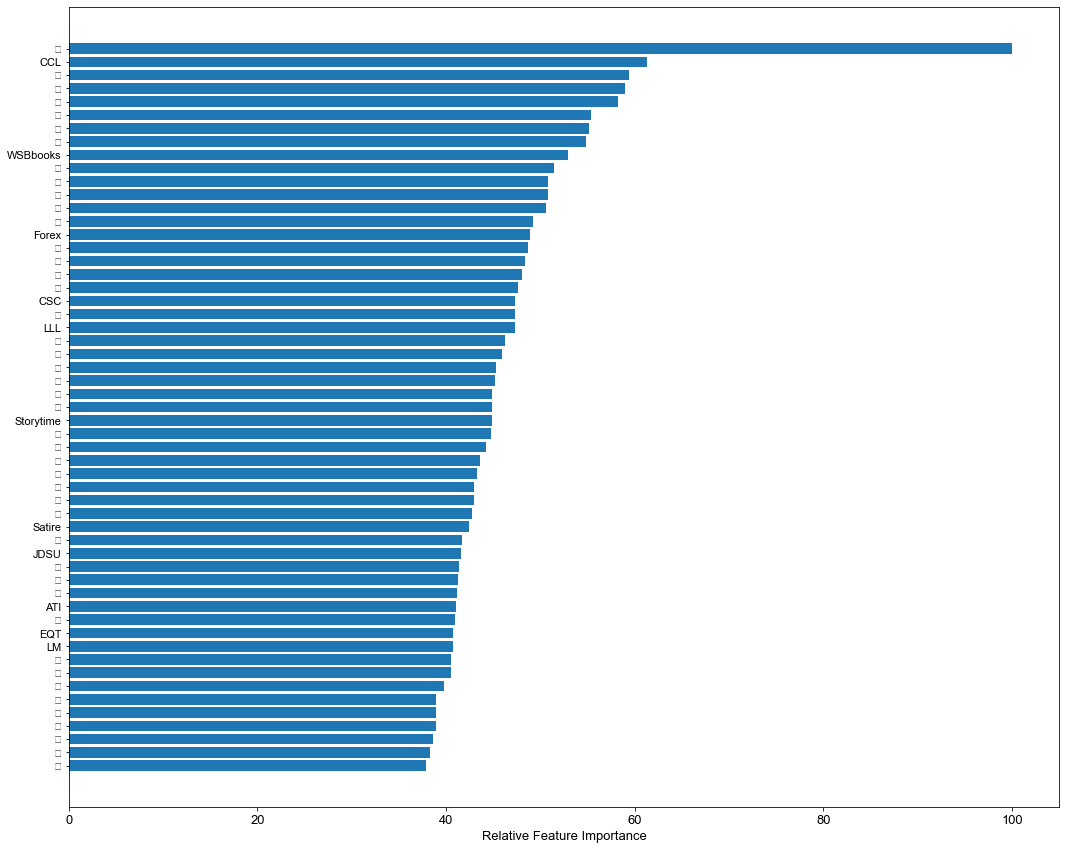

[('🌈', 43.98851203600579), ('🚈', 44.068056907098956), ('🚟', 44.288402531948606), ('👒', 44.30709386983138), ('🈴', 44.536732545703664), ('🔚', 44.633117349547646), ('↔', 44.707726921500665), ('LSI', 45.48167442695897), ('CLF', 45.929747208652614), ('🕞', 46.14688301648702), ('🦈', 46.4339726566554), ('😣', 46.71441411426402), ('EQT', 46.78050521928959), ('🐻', 46.997762163069936), ('🦏', 47.16320759904896), ('🎼', 47.66853348373054), ('🚱', 48.20910869827777), ('🍐', 48.542424988845795), ('🐿', 48.65801170906811), ('DF', 48.90115430504541), ('🔏', 49.55059759818723), ('TWX', 49.55059759818724), ('SYMC', 49.55059759818724), ('🔮', 49.6007975319382), ('\U0001fa91', 49.624076974694255), ('📔', 50.20031413487788), ('🚾', 50.608974362202964), ('♠', 51.13104528253161), ('🧫', 51.787831454366504), ('PETM', 51.96516912062711), ('LM', 52.02243485774277), ('🕶', 52.376610784737345), ('JDSU', 52.54944347737711), ('🍜', 52.6900908083074), ('🥟', 52.76913879925592), ('🧡', 52.91139277377284), ('LLL', 53.62468726174998)

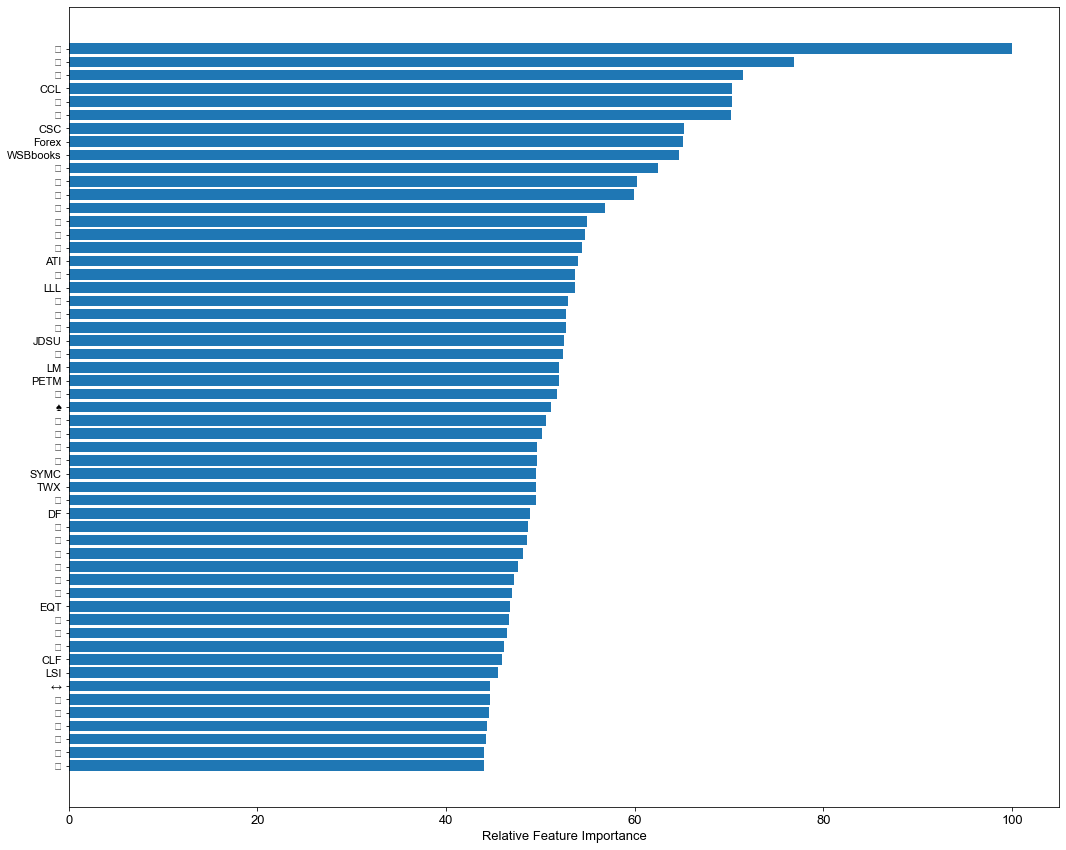

In [99]:
# iterate over classifiers
names = ["Logistic Regression","Linear SVM"]

classifiers = [
   LGR_grid_result.best_estimator_,
    SVC(kernel="linear", C=0.025) 
    
    ]

for name, clf in zip(names, classifiers):
       
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    ## Validation
    y_pred = clf.predict(X_test)   
    y_train_pred=clf.predict(X_train)
    
    #feature Imp
    # feature Importance
    feature_importance = abs(clf.coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    print(list(zip(np.array(X_test.columns)[sorted_idx][1800:],feature_importance[sorted_idx][1800:])))
    #with open("plots/"+name+".txt", "w") as fout:
    #        fout.write(str(list(zip(np.array(X_test.columns)[sorted_idx][3200:],feature_importance[sorted_idx][3200:]))))
    featfig = plt.figure(figsize=(15,12))
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos[1800:], feature_importance[sorted_idx][1800:], align='center')
    featax.set_yticks(pos[1800:])
    featax.set_yticklabels(np.array(X_test.columns)[sorted_idx][1800:], fontsize=11)
    featax.set_xlabel('Relative Feature Importance')
   
    plt.tight_layout()   
    plt.show()
    featfig.savefig("plots/f_i_"+name +".png")

In [100]:
from  matplotlib import pyplot
from matplotlib.pyplot import figure
def calculate_errors(predictions,method):
    ## get originl area from the transformed one.
   
    # RootMeanSquared Error Calculation 
    print("\n\nFor "+method)
    meanSquaredError_nb_one = mean_squared_error(y_test, predictions)
  
    rootMeanSquaredError_nb_one = sqrt(meanSquaredError_nb_one)
    print("RMSE:", rootMeanSquaredError_nb_one)

    # MeanAbsolute Error Calculation 
    absolute_error_nb_one = mean_absolute_error(y_test, predictions)
    print("Absolute error is:", absolute_error_nb_one)   
   
    
    #print("R2 error is:",r2_score(y_test_orig, predictions_inverse))
    
    #print(predictions)
    #print(y_test)
   
    fig = figure(figsize=(20, 12))
    pyplot.plot(predictions, label='Predicated Price (Normalized)')#, fontsize=18)
    pyplot.plot(y_test, label='Actual Price (Normalized)')#, fontsize=18)
    pyplot.xlabel('Date', fontsize=18)
    pyplot.ylabel('Price', fontsize=18)
    pyplot.xticks(fontsize=13, rotation=90)
    pyplot.legend( prop={'size':16})
    pyplot.show()    
    fig.savefig('plots/'+method +'.png')


In [101]:


#norm_labels = norm.transform(labels_reg)
# Partitioning the dataset into test and train (test = (25% of total data) and train = (75% of total data) )
X_train, X_test, y_train, y_test = train_test_split(dataset, labels_reg, test_size=0.25, random_state = 4)


# Importing all the required Regressors used in the paper

clf_nb = BayesianRidge(compute_score=True) # Naive-Bayes Ridge Regressor
clf_mr = LinearRegression() # Multiple-Regression
clf_dt = DecisionTreeRegressor(max_depth=50,random_state=0) # Decision Tree Regressor
clf_rf = RandomForestRegressor(max_depth=55, random_state=0, n_estimators=100, max_features=10) # Random Forest Regressor
clf_nn = MLPRegressor() # Neural Networks Regressor



For Naive Bayes
RMSE: 0.10015457004020852
Absolute error is: 0.0742647578122143


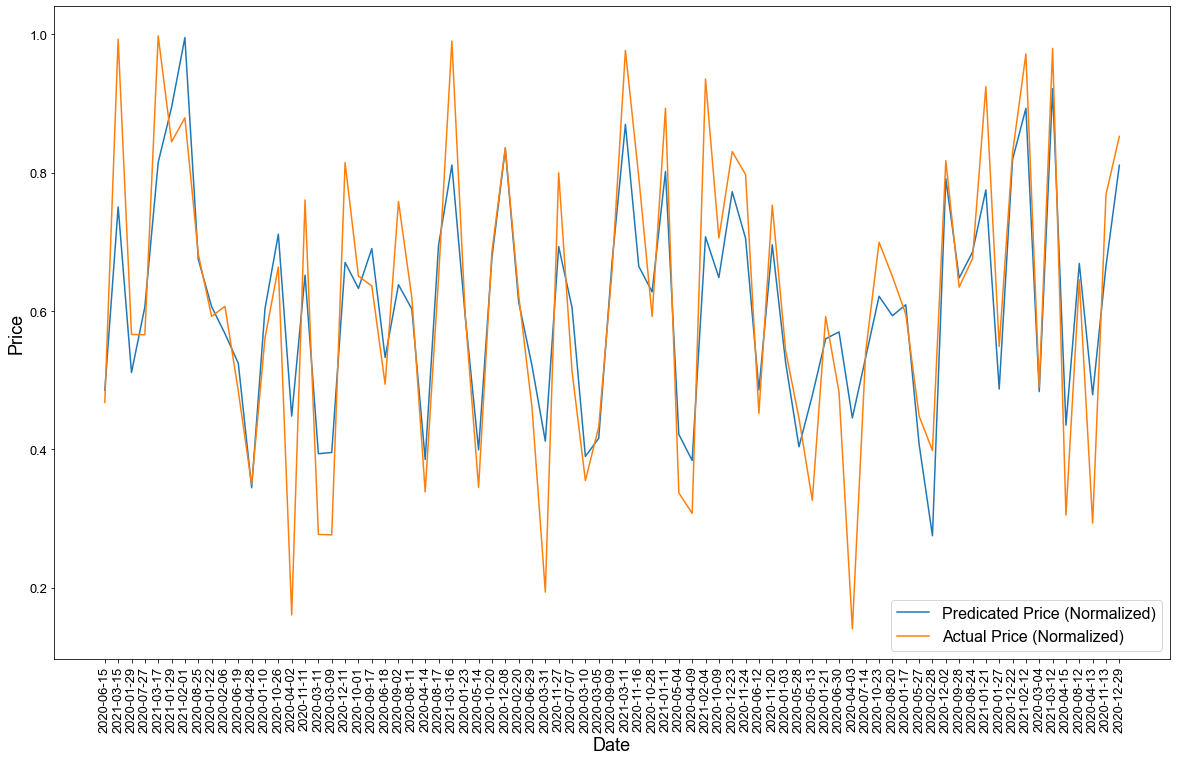



For Linear Regression
RMSE: 0.1287797736207694
Absolute error is: 0.10210668554546376


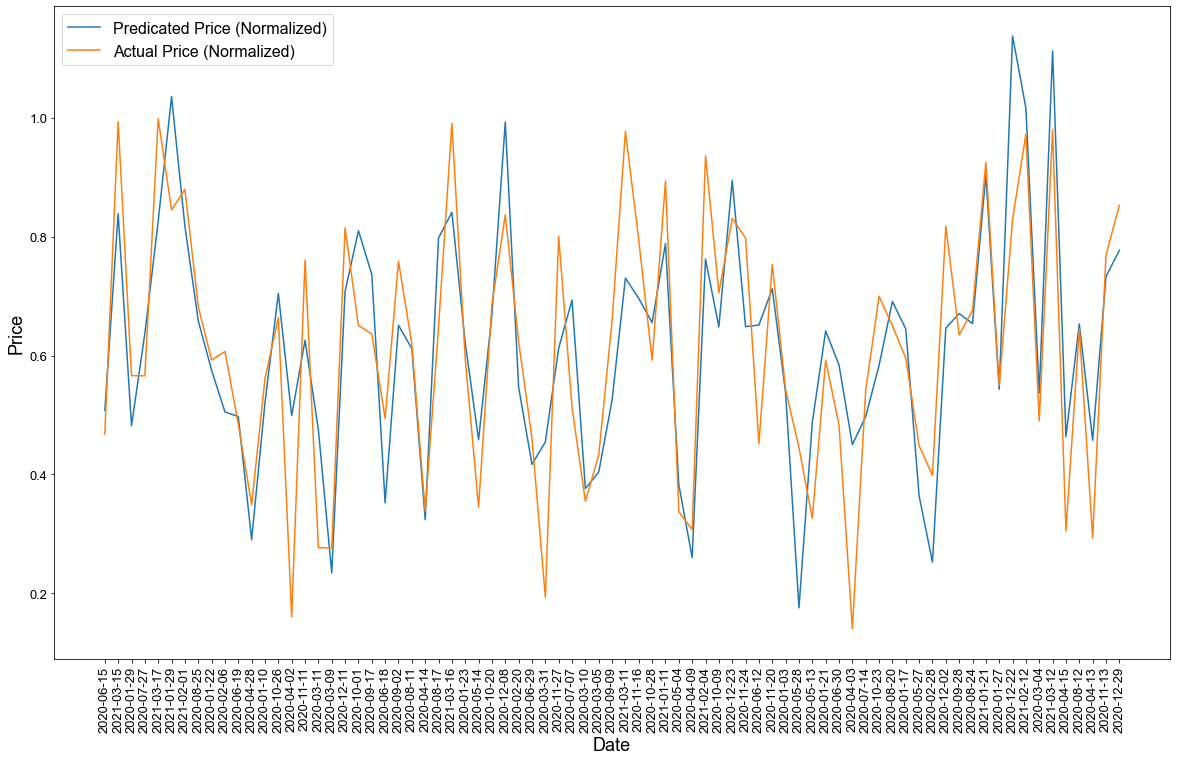



For Decision Trees
RMSE: 0.10127442222356335
Absolute error is: 0.06135260688057284


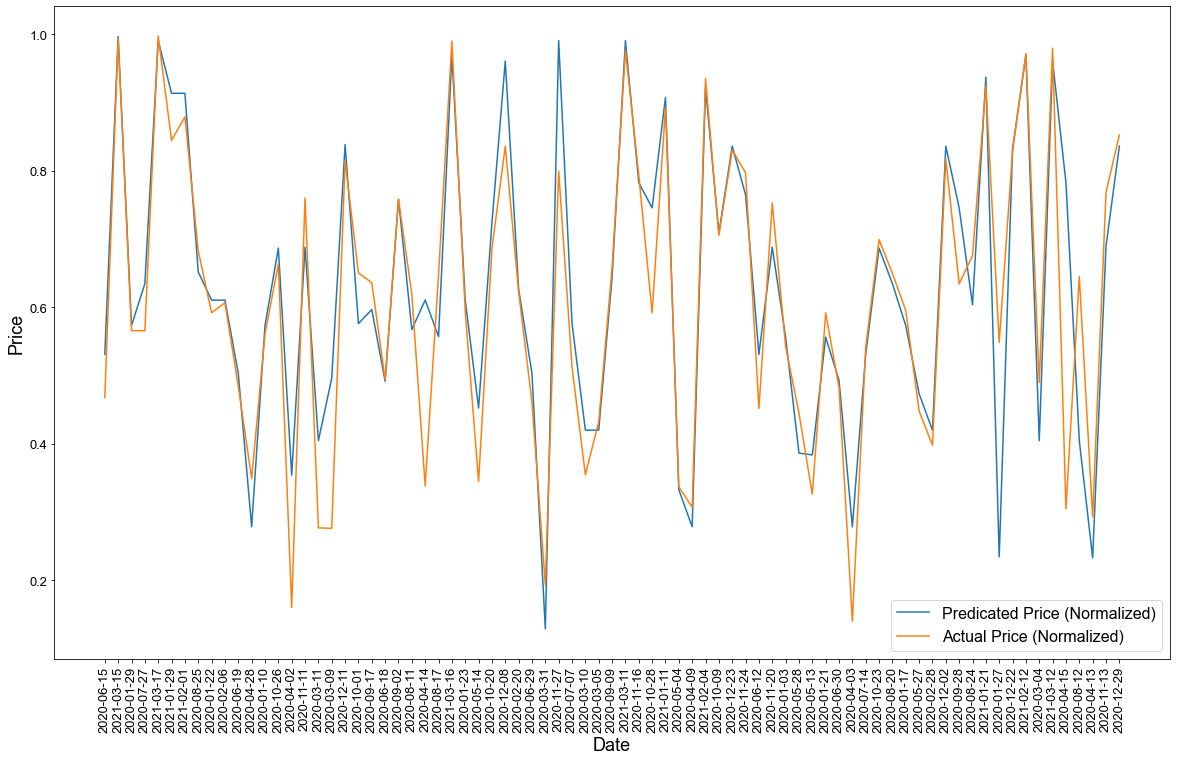



For Random Forest
RMSE: 0.09987016499182101
Absolute error is: 0.0791670624075392


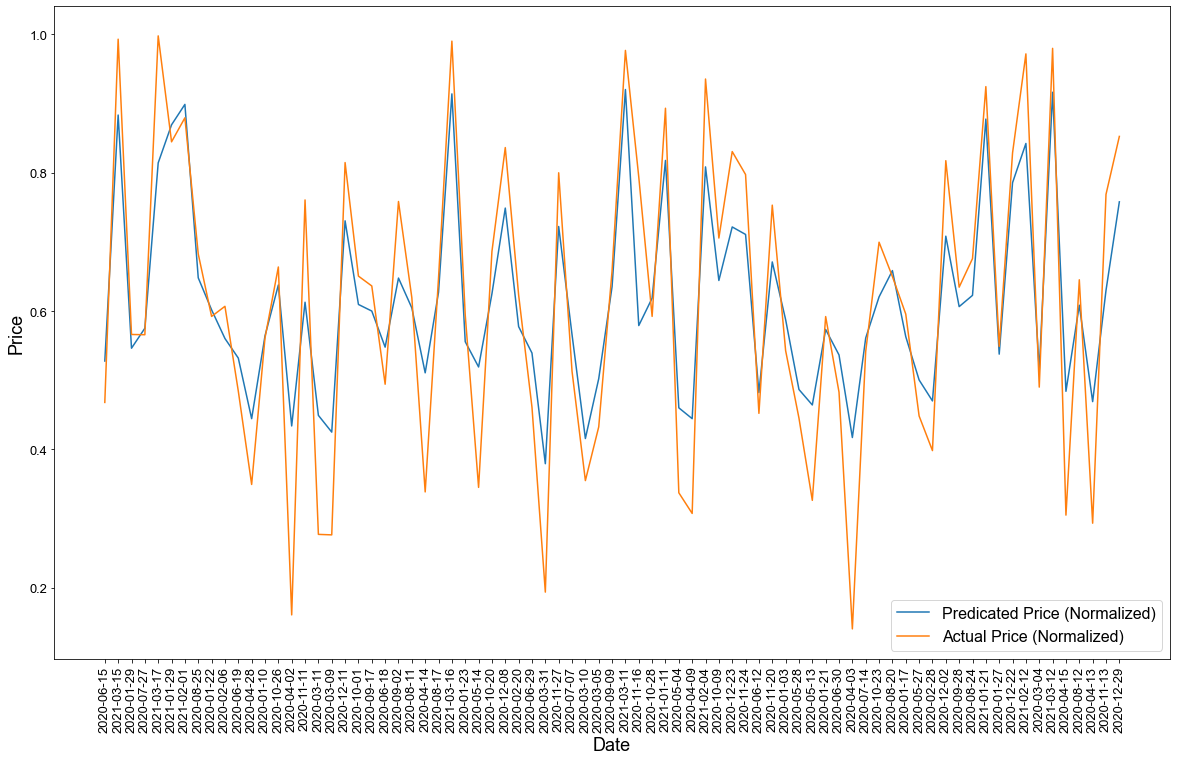



For MLP 
RMSE: 0.12636538866093527
Absolute error is: 0.09276462161047982


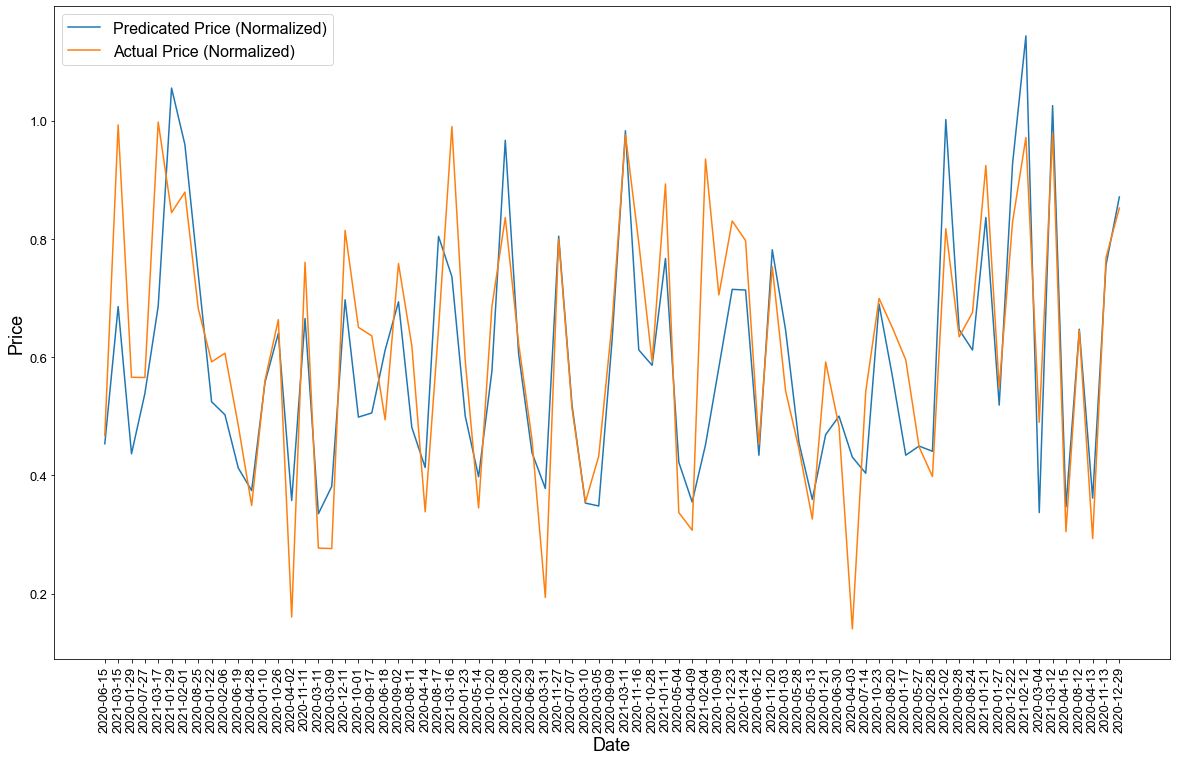



For SVM 
RMSE: 0.16872257967635593
Absolute error is: 0.13639996770411017


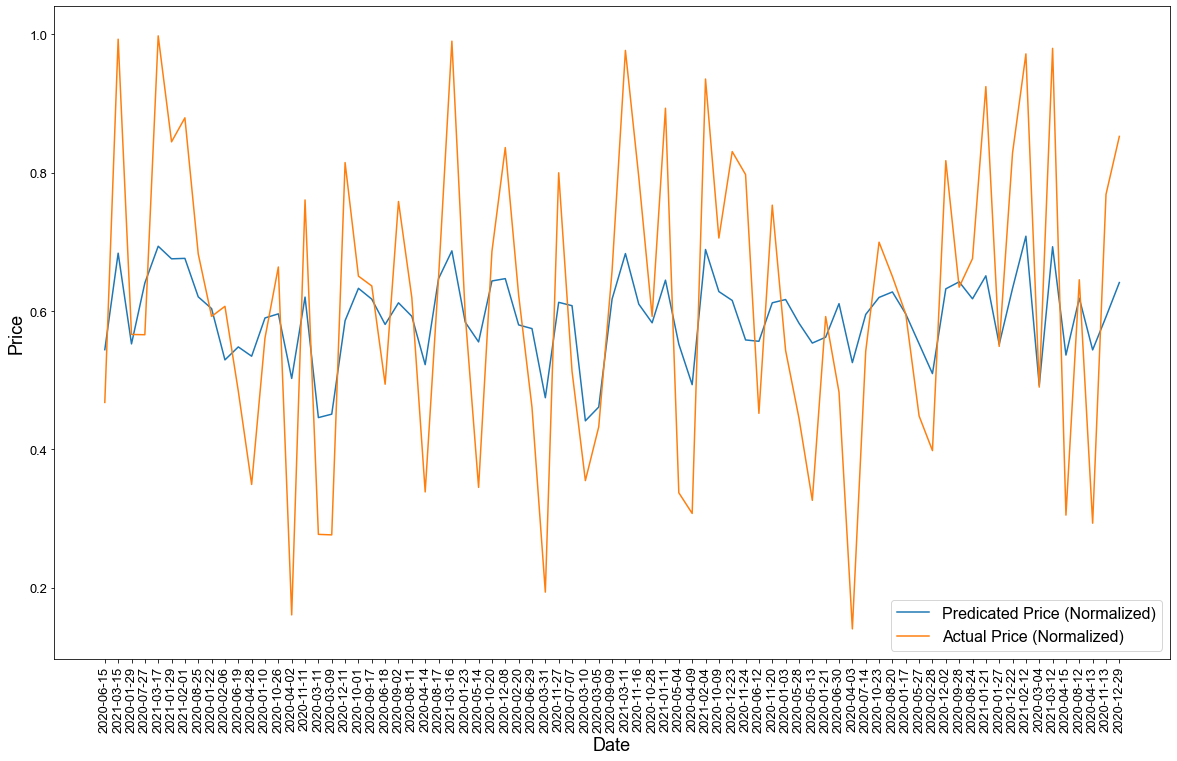

In [102]:
# Naive Bayes Regressor

# Training using Naive Bayes Regressor
clf_nb.fit(X_train, y_train)
# Testing using Naive Bayes Regressor
predictions_nb_one = clf_nb.predict(X_test)

#df_plot = pd.concat([y_test,pd.Series(predictions_nb_one)], axis=1)
#df_plot.head()


# Linear Regression

# Training using Linear Regression
clf_mr.fit(X_train, y_train)
# Testing using Linear Regression
predictions_mr_one = clf_mr.predict(X_test)

# Decision Trees Regressor

# Training using Decision Trees Regressor
clf_dt.fit(X_train, y_train)
# Testing using Decision Trees Regressor
predictions_dt_one = clf_dt.predict(X_test)



# Random Forest Regressor

# Training using Random Forest Regressor
clf_rf.fit(X_train, y_train)
# Testing using Random Forest Regressor
predictions_rf_one = clf_rf.predict(X_test)



# MLP Regressor

# Training using MLP Regressor
clf_nn.fit(X_train, y_train)
# Testing using MLP Regressor
predictions_nn_one = clf_nn.predict(X_test)



# SVM Regressor
clf_svm = SVR(C=3.0, epsilon=0.2) # SVM Regressor
# Training using SVM Regressor
clf_svm.fit(X_train, y_train)
# Testing using SVM Regressor
predictions_svm_one = clf_svm.predict(X_test)


calculate_errors(predictions_nb_one,"Naive Bayes")
calculate_errors(predictions_mr_one,"Linear Regression")
calculate_errors(predictions_dt_one,"Decision Trees")
calculate_errors(predictions_rf_one,"Random Forest")
calculate_errors(predictions_nn_one,"MLP ")
calculate_errors(predictions_svm_one,"SVM ")



For Lasso 
RMSE: 0.10697594614145306
Absolute error is: 0.08052361885966941


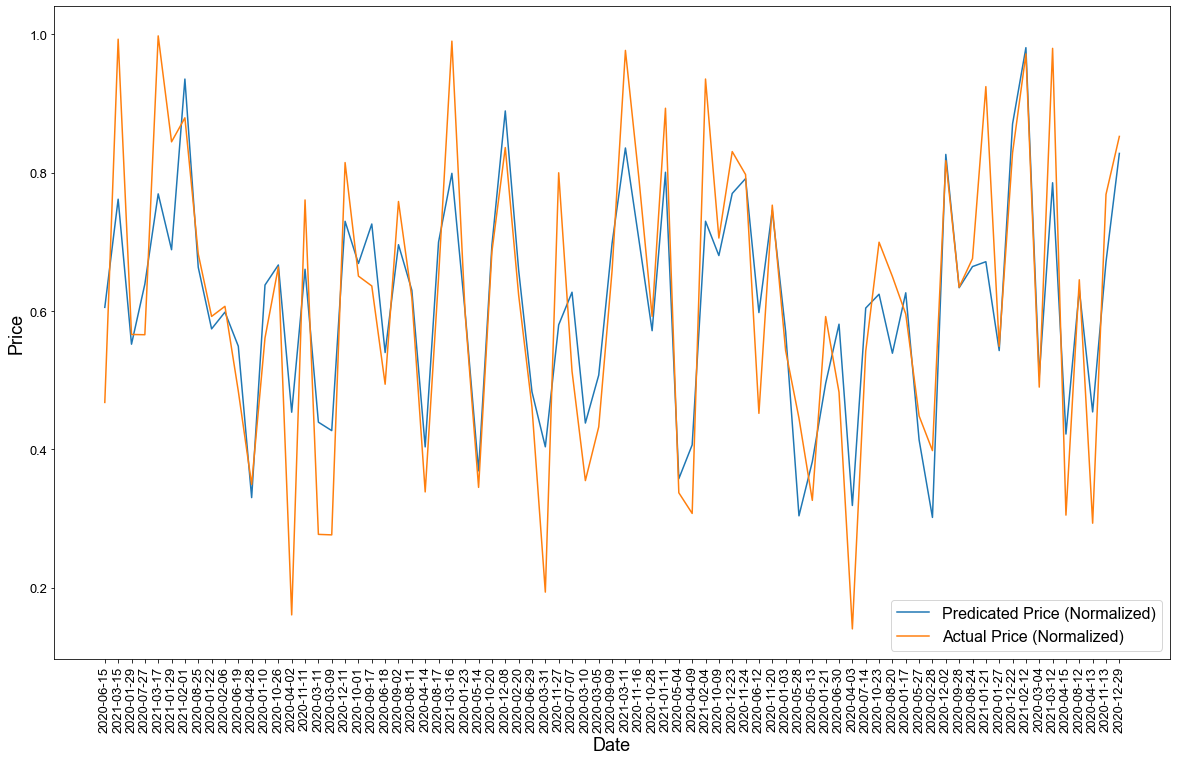

In [103]:
lasso = LassoCV().fit(X_train, y_train)
predictions_lasso = lasso.predict(X_test)
calculate_errors(predictions_lasso,"Lasso ")

[('🦇', 45.28051587546126), ('🐮', 46.4612392924092), ('TWC', 47.38011936800873), ('🆘', 47.893187697567086), ('🎪', 48.499290012324536), ('JCP', 48.68767910949436), ('Fundamentals', 50.74896585824913), ('🕵', 51.736614360125245), ('CLF', 51.953382434117714), ('DIS', 52.301945392850634), ('CA', 53.036861691590374), ('Forex', 53.7932605997448), ('🕯', 54.18240930524896), ('🕶', 54.51568870511249), ('Mods', 54.53429405353103), ('🦌', 54.94304233182889), ('\U0001fa78', 57.72418762299311), ('🍺', 61.942761720069065), ('Storytime', 62.28735724109298), ('F', 62.98416816624821), ('BA', 69.64013637562873), ('😷', 75.82309862423332), ('🦠', 83.08351697799881), ('Shitpost', 95.05190224577694), ('⏰', 100.0)]


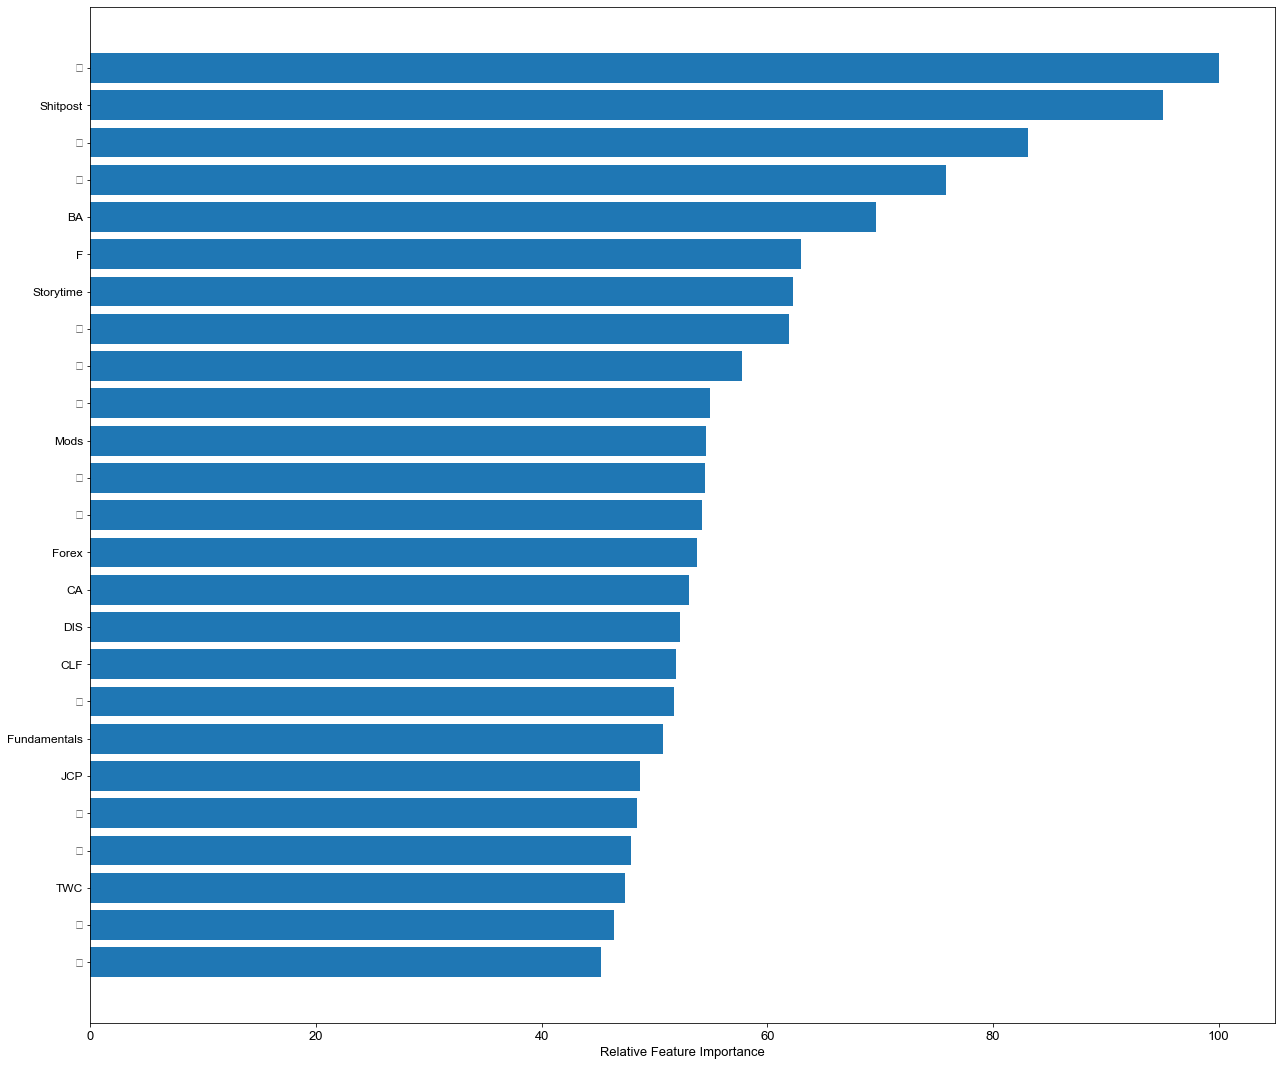

[('YOLO.1', 24.839663455464724), ('GE', 25.501509867726714), ('🥓', 25.74465171723836), ('⏰', 25.908972231997595), ('🧐', 25.97658718427524), ('\U0001fa73', 26.08233367794978), ('🆘', 26.095955103133956), ('Satire', 27.07561436166776), ('Storytime', 27.56773321788736), ('😪', 28.671738730620195), ('🎰', 28.950802491151194), ('🍝', 31.050915464538733), ('↘', 32.432201372071525), ('🦁', 33.144392432292335), ('🥶', 33.42003678632847), ('➰', 35.02896087630863), ('📌', 37.27344936277605), ('Fundamentals', 38.316004474712685), ('Shitpost', 41.34446761761155), ('OI', 44.333137356484805), ('😇', 45.96920236581313), ('\U0001f9af', 48.63475577827248), ('BEAM', 79.06461615778954), ('Mods', 79.71775717765537), ('Daily Discussion', 100.0)]


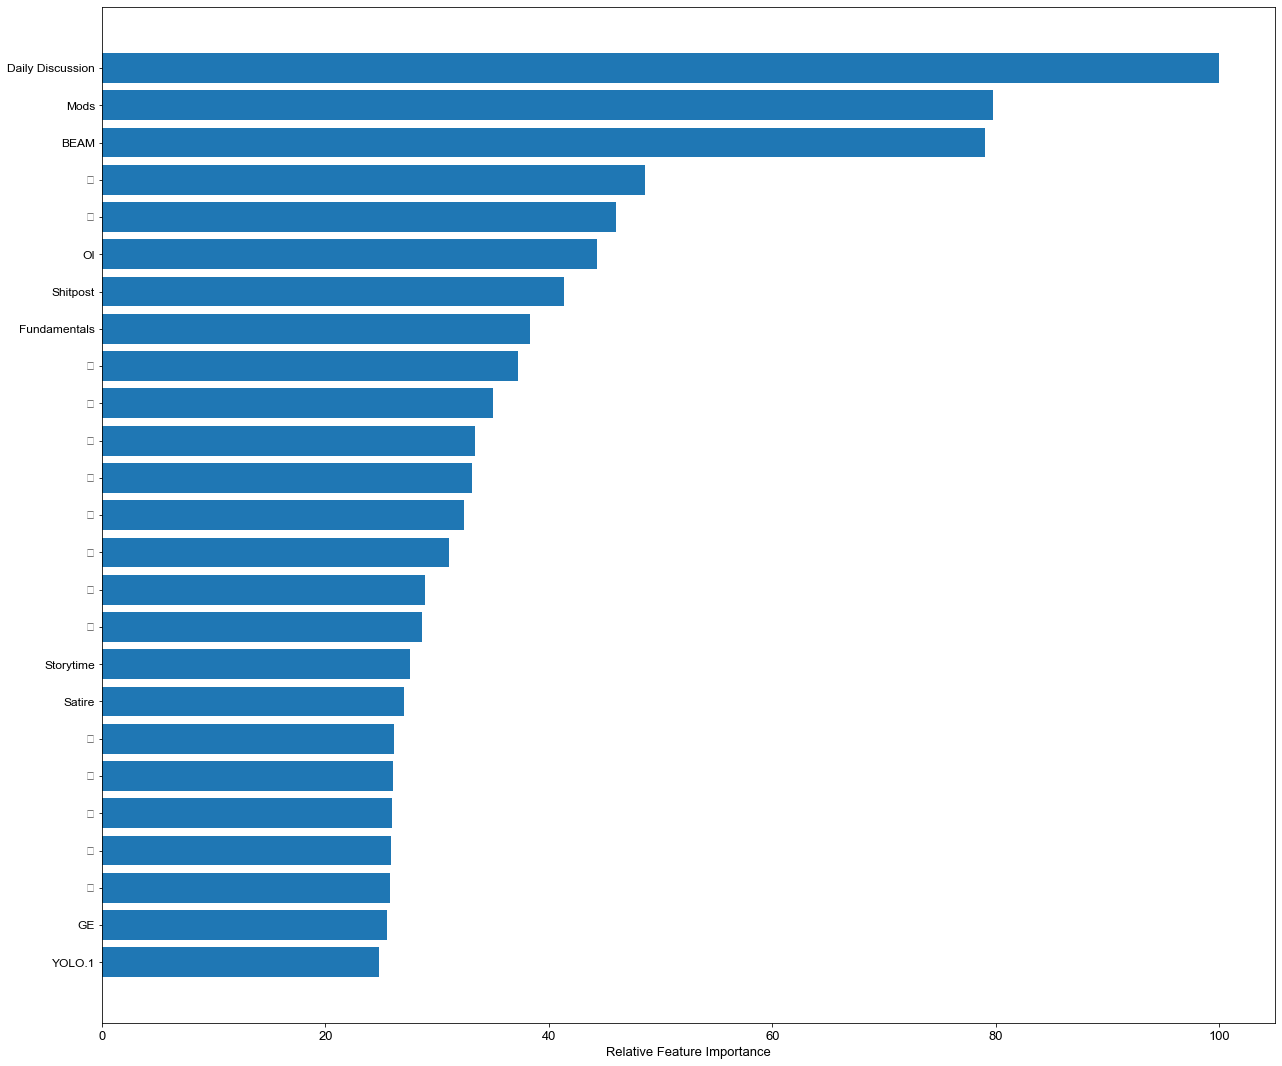

Decision Tree Regressor
Random Forest Regressor
Neural Networks Regressor
[('\U0001f9ce', 16.291308452828083), ('👁', 17.710985416130036), ('😰', 18.274314232322013), ('F', 18.369092056138246), ('🤑', 18.86451281276281), ('🦋', 18.976894721715237), ('PCG', 18.99144699317597), ('TDC', 19.566158920386897), ('🕵', 19.989723552517784), ('Chart', 20.357548879063813), ('Mods', 20.529415675071586), ('CLF', 22.082198639311105), ('🧣', 22.18768420280157), ('🆘', 22.58711827120085), ('😒', 24.195080657649914), ('💝', 26.975623545319166), ('🦌', 27.190200480949812), ('JCP', 27.502974949412646), ('Stocks', 29.436255616548344), ('🕯', 35.0640012412819), ('BA', 42.23237147324148), ('🦠', 47.104663472379315), ('⏰', 50.16557598028487), ('CA', 67.79576576182494), ('Shitpost', 100.0)]


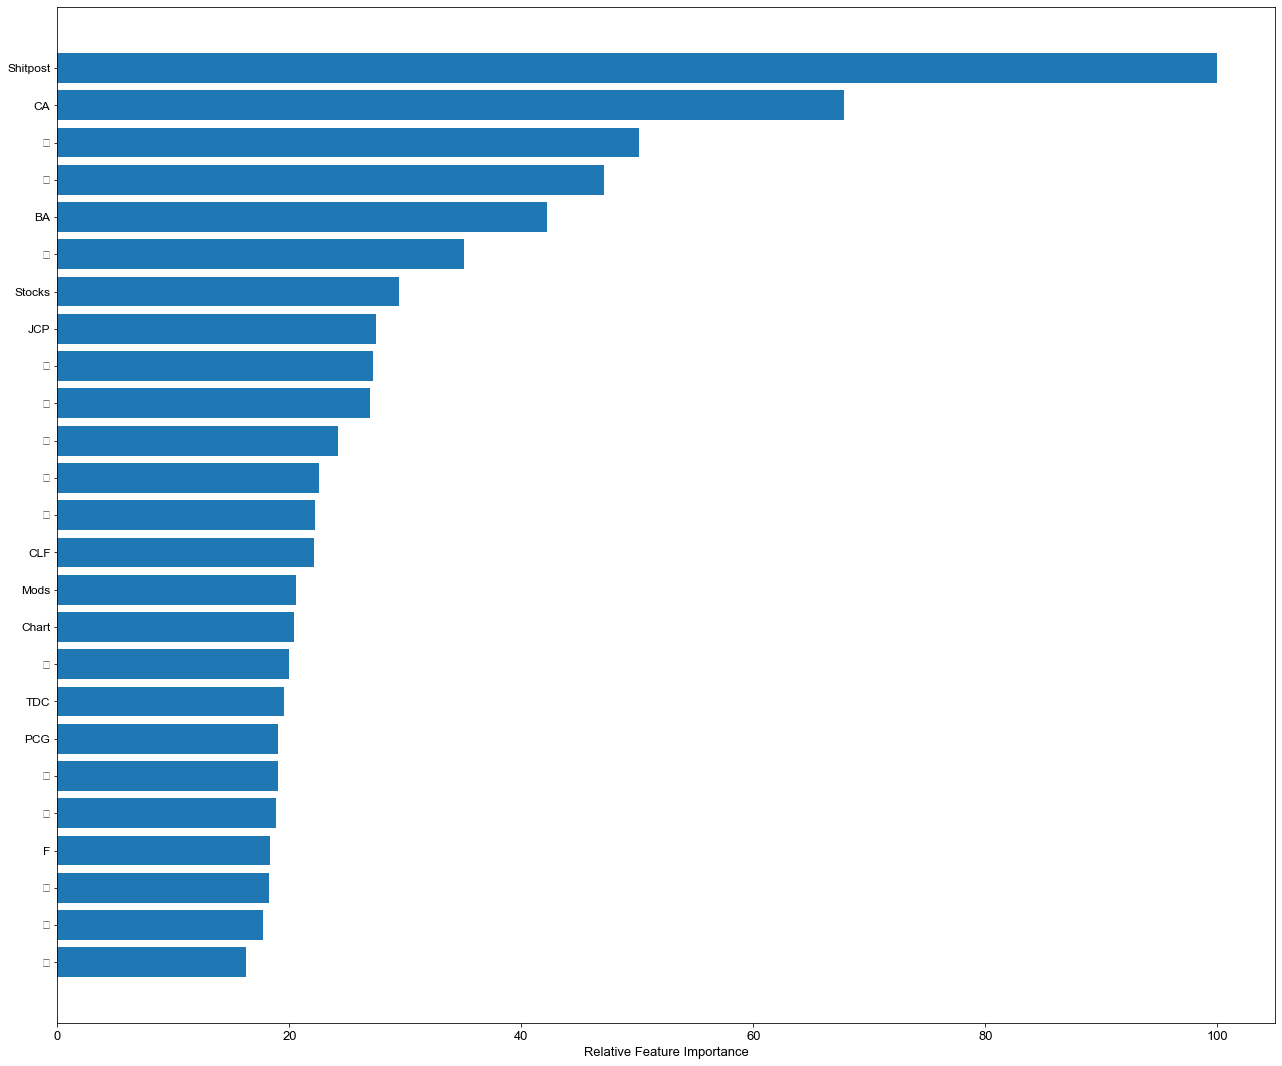

In [104]:
# iterate over regressors
names = ["Naive-Bayes Ridge Regressor","Multiple-Regression","Decision Tree Regressor","Random Forest Regressor","Neural Networks Regressor","Lasso"]

regressors = [
   clf_nb,
    clf_mr, clf_dt,clf_rf,clf_nn,lasso    
    ]

for name, clf in zip(names, regressors):
    if name == "Decision Tree Regressor" or name == "Random Forest Regressor" or  name == "Neural Networks Regressor":
        print(name)
    else:
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        ## Validation
        y_pred = clf.predict(X_test)   
        y_train_pred=clf.predict(X_train)

        #feature Imp
        # feature Importance
        feature_importance = abs(clf.coef_)
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        print(list(zip(np.array(X_test.columns)[sorted_idx][1830:],feature_importance[sorted_idx][1830:])))
        #with open("plots/"+name+".txt", "w") as fout:
        #        fout.write(str(list(zip(np.array(X_test.columns)[sorted_idx][3200:],feature_importance[sorted_idx][3200:]))))
        featfig = plt.figure(figsize=(18,15))
        featax = featfig.add_subplot(1, 1, 1)
        featax.barh(pos[1830:], feature_importance[sorted_idx][1830:], align='center')
        featax.set_yticks(pos[1830:])
        featax.set_yticklabels(np.array(X_test.columns)[sorted_idx][1830:], fontsize=12)
        featax.set_xlabel('Relative Feature Importance')

        plt.tight_layout()   
        plt.show()
        featfig.savefig("plots/f_i_"+name +".png")

In [108]:
from mlxtend.feature_selection import SequentialFeatureSelector  ## Sequential  Selection
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt




In [ ]:
sfs = SequentialFeatureSelector(LinearRegression(), k_features=60, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          #scoring='neg_mean_squared_error',
          cv=10)
sfs.fit(X_train, y_train)

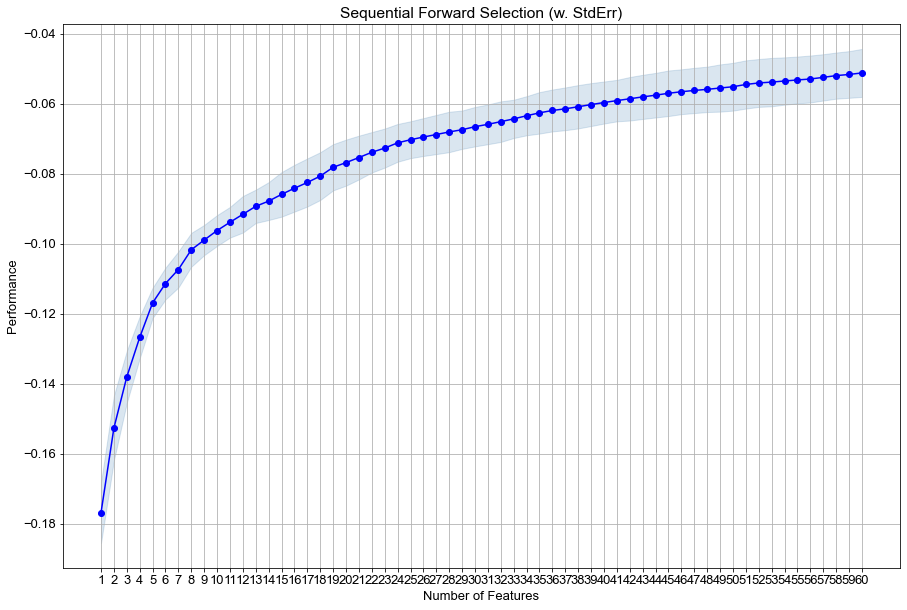

<Figure size 1800x360 with 0 Axes>

In [53]:
#featfig = plt.figure(figsize=(100,100))

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err',figsize=(15,10))
#plt.figsize=(20,30)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
plt.savefig("plots/sfs_LR_process.png")

In [54]:
plt.savefig("plots/sfs_LR_process.png")

<Figure size 1800x360 with 0 Axes>

In [55]:
sfs.k_feature_names_

('title_polarity',
 '🐻',
 '😗',
 '🤹',
 '🏅',
 '🐗',
 '⏰',
 '😒',
 '\U0001f9bc',
 '⚰',
 '🧢',
 '☠',
 '🔜',
 '⛷',
 '😟',
 '🚑',
 '👁',
 '🕸',
 '🕚',
 '🥶',
 '♥',
 '↘',
 '👷',
 '📸',
 '🐜',
 '☘',
 '🦠',
 '♎',
 '🧖',
 '❌',
 '🛁',
 '🏈',
 '🎿',
 '🥀',
 '🕯',
 '👘',
 '💝',
 '⛱',
 '👠',
 '🚳',
 '🗃',
 '🎪',
 '🛤',
 '🧣',
 '💟',
 '🧭',
 '⏯',
 'Shitpost',
 'Stocks',
 'AMD',
 'A',
 'BA',
 'CA',
 'PCG',
 'THC',
 'STI',
 'HAR',
 'CSC',
 'ARG',
 'POM')

In [112]:
sfs_rf = SequentialFeatureSelector(RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10, max_features=10), k_features=20, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          #scoring='neg_mean_squared_error',
          cv=5)
sfs_rf.fit(X_train, y_train)


SequentialFeatureSelector(estimator=RandomForestRegressor(max_depth=10,
                                                          max_features=10,
                                                          n_estimators=10,
                                                          random_state=0),
                          k_features=20, scoring='neg_root_mean_squared_error')

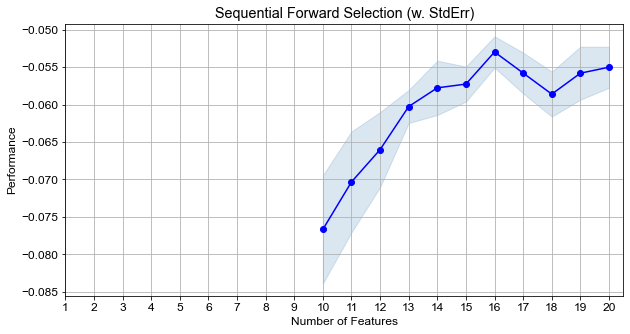

In [116]:

fig = plot_sfs(sfs_rf.get_metric_dict(), kind='std_err',figsize=(10,5))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [117]:
sfs_rf.k_feature_names_

('title_polarity',
 'title_subjectivity',
 'submission_body_polarity',
 'submission_body_subjectivity',
 'submission_count',
 'submission_score',
 'upvote_ratio',
 'comment_body_polarity',
 'comment_body_subjectivity',
 '🤡',
 '🖐',
 '🎁',
 '🏪',
 '🦓',
 '💈',
 '🈂',
 'Options',
 'News',
 'GME',
 'DRI')

In [ ]:
sfs = SequentialFeatureSelector(SVR(C=3.0, epsilon=0.2), k_features=(20, 22),  # range of feature
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          cv=10)
sfs.fit(X_train, y_train)
print('best combination (ACC: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
sfs.k_feature_names_